<a href="https://colab.research.google.com/github/azmiak/Kuliah-Deep-Learning/blob/main/Week%203%20/%20Tugas%20/%20Tensorflow_SVHN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# Load SVHN dataset
(ds_train, ds_test), ds_info = tfds.load('svhn_cropped', split=['train', 'test'], as_supervised=True, with_info=True)

# Preprocessing function
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply preprocessing
ds_train = ds_train.map(preprocess).batch(128).shuffle(1000)
ds_test = ds_test.map(preprocess).batch(128)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.4BQU4M_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.4BQU4M_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.4BQU4M_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.


In [ ]:
# Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train model
history = model.fit(ds_train, validation_data=ds_test, epochs=10, callbacks=[reduce_lr, early_stop])

Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 47s 33ms/step - accuracy: 0.3529 - loss: 1.9426 - val_accuracy: 0.5796 - val_loss: 1.4074 - learning_rate: 0.0010
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.8338 - loss: 0.5610 - val_accuracy: 0.7638 - val_loss: 0.7575 - learning_rate: 0.0010
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8792 - loss: 0.4176 - val_accuracy: 0.8594 - val_loss: 0.5117 - learning_rate: 0.0010
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8994 - loss: 0.3472 - val_accuracy: 0.8696 - val_loss: 0.4479 - learning_rate: 0.0010
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9180 - loss: 0.2849 - val_accuracy: 0.8742 - val_loss: 0.4332 - learning_rate: 0.0010
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9253 - loss: 0.2587 - val_accuracy: 0.8725 - val_loss: 0.4510 - learning_rate: 0.0010
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9340 - l

In [ ]:
# Evaluate model
y_true, y_pred, y_scores = [], [], []

for images, labels in ds_test:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_scores.extend(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━

In [ ]:
# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1_squared = f1_score(y_true, y_pred, average='macro') ** 2
auc = roc_auc_score(tf.keras.utils.to_categorical(y_true, 10), np.array(y_scores), multi_class='ovr')

print(f'Final Accuracy: {accuracy:.4f}')
print(f'Final Precision: {precision:.4f}')
print(f'Final Recall: {recall:.4f}')
print(f'Final F1 Squared: {f1_squared:.4f}')
print(f'Final AUC: {auc:.4f}')

Final Accuracy: 0.9012
Final Precision: 0.8938
Final Recall: 0.8920
Final F1 Squared: 0.7954
Final AUC: 0.9913


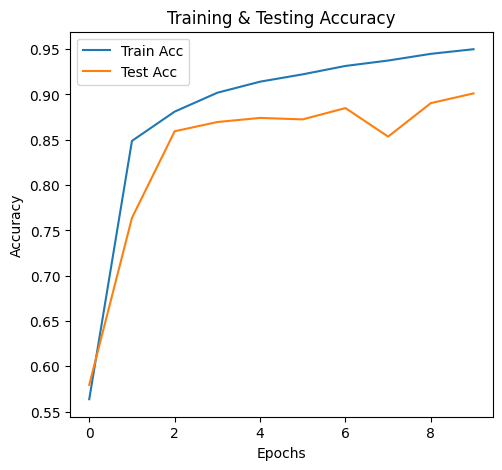

In [ ]:
# Plot Accuracy & Loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Test Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Testing Accuracy")
plt.legend()
plt.show()

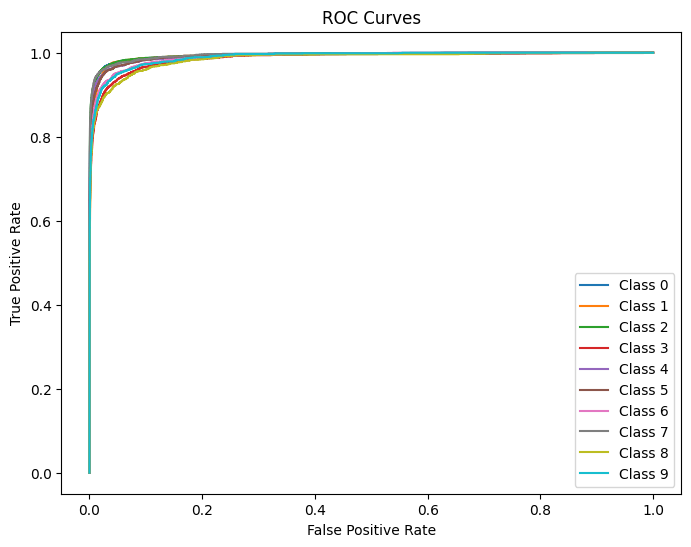

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8,6))
for i in range(10):
    fpr, tpr, _ = roc_curve(np.array(y_true) == i, np.array(y_scores)[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Evaluasi Model CNN - CIFAR-10 Dataset

## Persamaan Matematika Evaluasi Model

Metrik evaluasi yang digunakan untuk menilai performa model CNN pada dataset CIFAR-10.

---

### 1. **Accuracy**

Mengukur seberapa banyak prediksi yang benar.


$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$


Keterangan:
- **TP** = True Positive
- **TN** = True Negative
- **FP** = False Positive
- **FN** = False Negative

---

### 2. **Precision**

Mengukur seberapa tepat prediksi positif model.

$\text{Precision} = \frac{TP}{TP + FP}$

---

### 3. **Recall**

Mengukur seberapa banyak data positif yang berhasil diprediksi model.

$\text{Recall} = \frac{TP}{TP + FN}$

---

### 4. **F1-Score**

Rata-rata harmonis dari Precision dan Recall untuk menyeimbangkan keduanya.

$\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

---

### 5. **AUC (Area Under Curve)**

Mengukur kemampuan model untuk membedakan antara kelas positif dan negatif. Nilai AUC berada di antara 0 dan 1. Semakin tinggi nilainya, semakin baik model dalam membedakan antar kelas.

$$
\text{AUC} = \int_{0}^{1} \text{TPR}(\text{FPR}) \, d\text{FPR}
$$

---

### 6. **ROC Curve (Receiver Operating Characteristic Curve)**

Kurva ROC menggambarkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR):

\[
$\text{TPR} = \frac{TP}{TP + FN}$
\]

\[
$\text{FPR} = \frac{FP}{FP + TN}$
\]